In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import collections

In [114]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
datadir = './'
adult_fn = 'adult.data'
adult_test_fn = 'adult.test'
adult_col = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','y']

In [101]:
adult = pd.read_csv(datadir + adult_fn, sep=', ', header=None, names=adult_col, skiprows=None, na_values='?', keep_default_na=False, engine='python')

In [102]:
adult.shape

(32561, 15)

In [103]:
adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
y                    0
dtype: int64

In [110]:
adult.dropna(axis=0, how='any', inplace=True)

In [111]:
adult.shape

(30162, 15)

In [189]:
categorical_col = adult.columns[map(lambda x:x==np.object, adult.dtypes)]
categorical_features = filter(lambda x:x!='y', categorical_col)
numerical_col = adult.columns[map(lambda x:x!=np.object, adult.dtypes)]

In [113]:
adult.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## distributions of capital gain and capital loss are interesting

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BE403C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D9C9668>]], dtype=object)

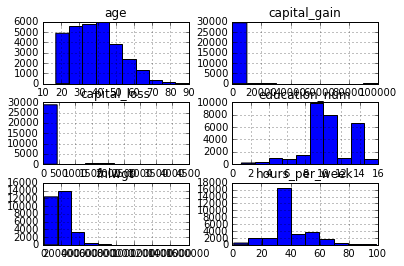

In [116]:
adult.hist()

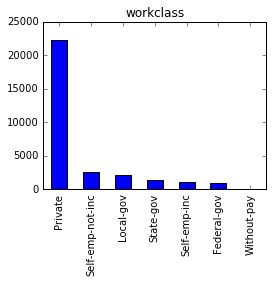

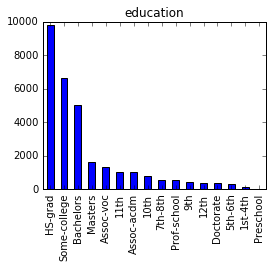

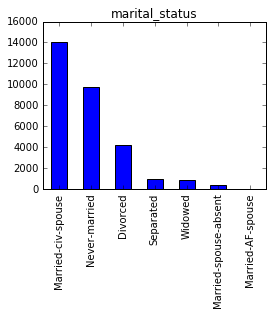

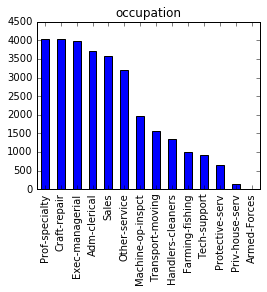

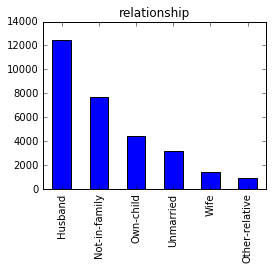

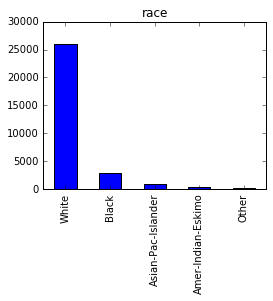

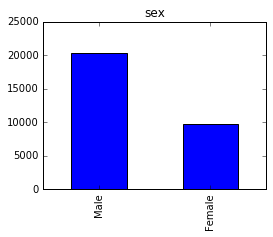

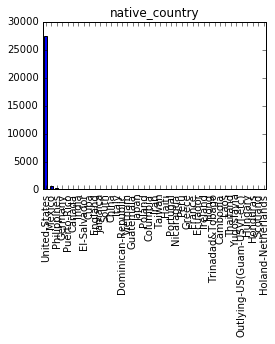

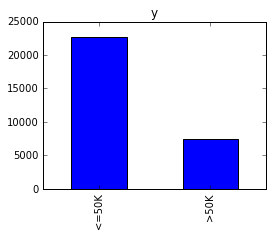

In [162]:
for col in categorical_col:
    adult[col].value_counts().plot(kind='bar', figsize=(4, 3))        
    plt.title(col)
    plt.show()

In [106]:
adult_test = pd.read_csv(datadir + adult_test_fn, sep=', ', header=None, names=adult_col, skiprows=[0], na_values='?', keep_default_na=False, engine='python')

In [107]:
adult_test.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,y
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [108]:
adult_test.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
y                   0
dtype: int64

In [210]:
adult_test.dropna(axis=0, how='any', inplace=True)

In [263]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

# calculate features

In [281]:
dat = adult[filter(lambda x:x!='y', adult.columns)]
tdat = adult_test[dat.columns]

In [287]:
def fit_encoder(dat, categorical_features):
    lbenc = collections.defaultdict(LabelEncoder)
    fit = dat[categorical_features].apply(lambda x: lbenc[x.name].fit_transform(x))
    ohenc = OneHotEncoder()
    ohenc.fit(fit)
    return lbenc, ohenc

In [282]:
lbenc, ohenc = fit_encoder(dat, categorical_features)

In [303]:
fit.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,5,9,4,0,1,4,1,38
1,4,9,2,3,0,4,1,38
2,2,11,0,5,1,4,1,38
3,2,1,2,5,0,2,1,38
4,2,9,2,9,5,2,0,4


In [307]:
pd.get_dummies?

In [306]:
ohenc.

'all'

In [300]:
def one_hot_encoding(dat, categorical_features, lbenc, ohenc):
    fit = dat[categorical_features].apply(lambda x: lbenc[x.name].transform(x))
    xfit = DataFrame(ohenc.transform(fit).toarray(), index=dat.index, )
    dat.drop(categorical_features, axis=1, inplace=True)
    dat = pd.concat([dat, xfit], axis=1)
    return dat

In [301]:
x = one_hot_encoding(dat, categorical_features, lbenc, ohenc)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
dat = one_hot_encoding(dat, categorical_features)
dat = enc.fit_transform(adult[categorical_features].to_dict(outtype='records').toarray())

In [212]:
tdat = one_hot_encoding(tdat, categorical_features)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [213]:
y = (adult['y'] == '>50K').astype(int)
ty = (adult_test['y'] == '>50K').astype(int)

In [215]:
dat.columns

Index([u'age', u'fnlwgt', u'education_num', u'capital_gain', u'capital_loss',
       u'hours_per_week', u'workclass_Federal-gov', u'workclass_Local-gov',
       u'workclass_Private', u'workclass_Self-emp-inc',
       ...
       u'native_country_Portugal', u'native_country_Puerto-Rico',
       u'native_country_Scotland', u'native_country_South',
       u'native_country_Taiwan', u'native_country_Thailand',
       u'native_country_Trinadad&Tobago', u'native_country_United-States',
       u'native_country_Vietnam', u'native_country_Yugoslavia'],
      dtype='object', length=104)

In [216]:
tdat.columns

Index([u'age', u'fnlwgt', u'education_num', u'capital_gain', u'capital_loss',
       u'hours_per_week', u'workclass_Federal-gov', u'workclass_Local-gov',
       u'workclass_Private', u'workclass_Self-emp-inc',
       ...
       u'native_country_Portugal', u'native_country_Puerto-Rico',
       u'native_country_Scotland', u'native_country_South',
       u'native_country_Taiwan', u'native_country_Thailand',
       u'native_country_Trinadad&Tobago', u'native_country_United-States',
       u'native_country_Vietnam', u'native_country_Yugoslavia'],
      dtype='object', length=103)

In [206]:
rf = RandomForestClassifier()

In [207]:
rf.fit(dat, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [214]:
py = rf.predict_proba(tdat)

ValueError: Number of features of the model must  match the input. Model n_features is 104 and  input n_features is 103 

In [308]:
pd.cut(range(10), 3)

[(-0.009, 3], (-0.009, 3], (-0.009, 3], (-0.009, 3], (3, 6], (3, 6], (3, 6], (6, 9], (6, 9], (6, 9]]
Categories (3, object): [(-0.009, 3] < (3, 6] < (6, 9]]

In [171]:
dt = DecisionTreeClassifier()